# Project 2: In-Depth Exploratory Data Analysis (EDA) - Netflix Content Analysis 🎬

**Project Objective:** To perform an in-depth exploratory data analysis of the Netflix dataset. We will explore trends in content production, identify popular genres, analyze content ratings, and understand the distribution of movies and TV shows on the platform. This project builds on foundational EDA by introducing time-series analysis and more complex data cleaning and transformation techniques.

## Step 1: Setup - Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# Set a consistent style for our plots
sns.set_style('darkgrid')

## Step 2: Data Loading and Initial Inspection

In [2]:
!git clone "https://github.com/HarshvardhanSingh-13/Datasets"

fatal: destination path 'Datasets' already exists and is not an empty directory.


In [3]:
netflix_df = pd.read_csv('./Datasets/Netflix_Titles Dataset/netflix_titles.csv')
netflix_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [4]:
# Get a concise summary of the dataframe
netflix_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


Interpretation of .info():

We have 7787 entries (titles).
Key Problem: The date_added column is of type object (a string), not a datetime object. We cannot perform time-based analysis until this is corrected.
Missing Values: director, cast, country, date_added, and rating all have missing values. director has the most significant number of nulls.

## Step 3: Data Cleaning and Transformation

In [5]:
# 1. Handle missing values in 'director' and 'cast'
# Since these are text fields and many are missing, we'll fill them with 'Unknown'.
netflix_df['director'] = netflix_df['director'].fillna('Unknown')
netflix_df['cast'] = netflix_df['cast'].fillna('Unknown')

In [6]:
# 2. Handle missing 'country'
# We'll fill with the mode, which is the most common country.
mode_country = netflix_df['country'].mode()[0]
netflix_df['country'] = netflix_df['country'].fillna(mode_country)

In [7]:
# 3. Drop the few rows with missing 'date_added' and 'rating'
# Since the number is small (less than 0.2% of data), dropping them is a safe option.
netflix_df.dropna(subset=['date_added', 'rating'], inplace=True)

In [8]:
# 4. Convert 'date_added' to datetime objects
# Use format='mixed' to handle potential variations in date formats
netflix_df['date_added'] = pd.to_datetime(netflix_df['date_added'], format='mixed', dayfirst=False)

In [9]:
# 5. Create new features for year and month added
netflix_df['year_added'] = netflix_df['date_added'].dt.year
netflix_df['month_added'] = netflix_df['date_added'].dt.month

In [10]:
# Verify our cleaning and transformation
print("Missing values after cleaning:")
print(netflix_df.isnull().sum())
print("\nData types after transformation:")
print(netflix_df.dtypes)

Missing values after cleaning:
show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
year_added      0
month_added     0
dtype: int64

Data types after transformation:
show_id                 object
type                    object
title                   object
director                object
cast                    object
country                 object
date_added      datetime64[ns]
release_year             int64
rating                  object
duration                object
listed_in               object
description             object
year_added               int32
month_added              int32
dtype: object


## Step 4: Exploratory Data Analysis & Visualization

### 4.1 What is the distribution of content type?

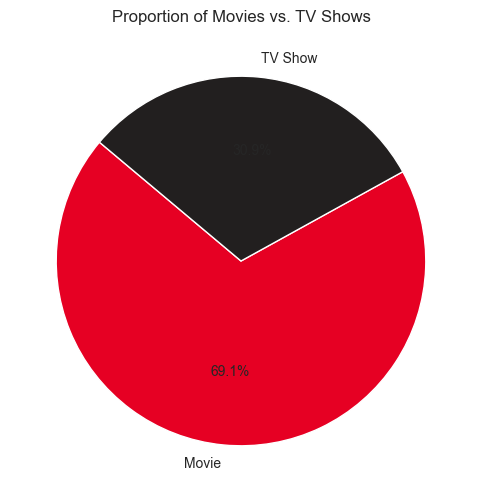

In [11]:
plt.figure(figsize=(8, 6))
type_counts = netflix_df['type'].value_counts()
plt.pie(type_counts, labels=type_counts.index, autopct='%1.1f%%', startangle=140, colors=['#e60023', '#221f1f'])
plt.title('Proportion of Movies vs. TV Shows')
plt.ylabel('')
plt.show()

Insight: The Netflix library is dominated by Movies, which make up roughly 70% of the content in this dataset.

### 4.2 How has content been added over time?

<Figure size 1400x800 with 0 Axes>

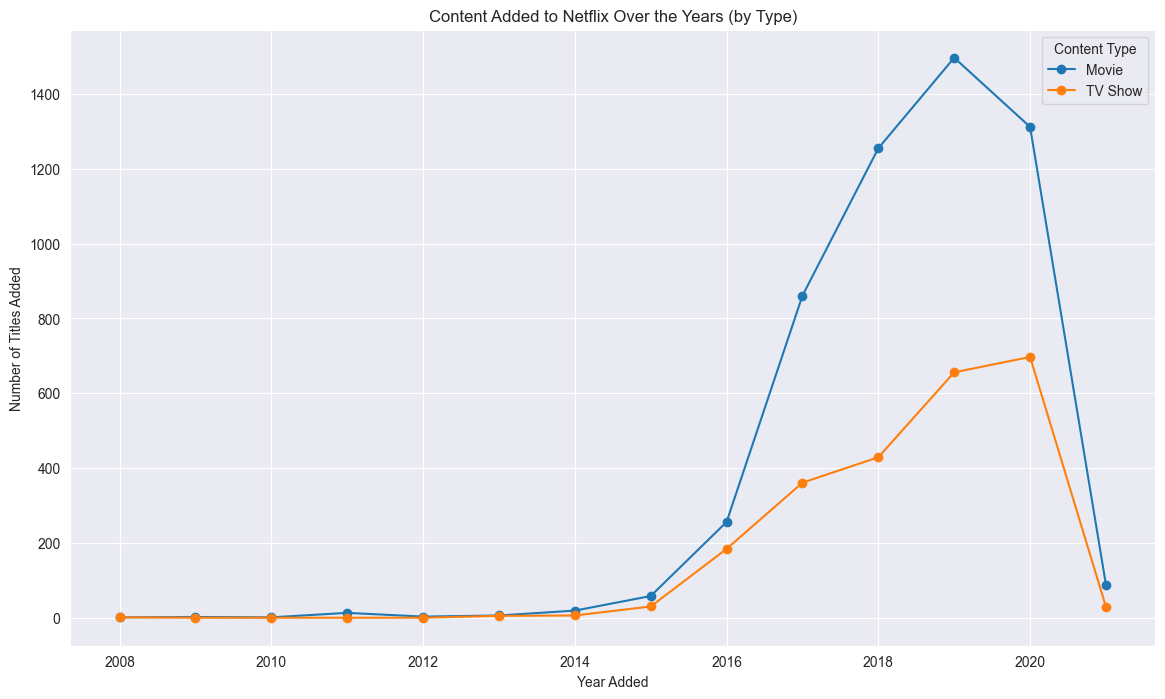

In [12]:
# Group data by year and content type
content_over_time = netflix_df.groupby(['year_added', 'type']).size().unstack().fillna(0)

plt.figure(figsize=(14, 8))
content_over_time.plot(kind='line', marker='o', figsize=(14, 8))
plt.title('Content Added to Netflix Over the Years (by Type)')
plt.xlabel('Year Added')
plt.ylabel('Number of Titles Added')
plt.legend(title='Content Type')
plt.grid(True)
plt.show()

**Insight:** By separating movies and TV shows, we can see that while both grew significantly, the addition of movies accelerated much more dramatically, peaking in 2019. The growth in TV shows has been more steady. There appears to be a slight slowdown in content additions in 2020 and 2021, which could be due to the COVID-19 pandemic affecting productions or the dataset being incomplete for the latest year.

In [13]:
netflix_df.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added
0,s1,TV Show,3%,Unknown,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020,8
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016,12


### 4.3 What are the most popular genres?

In [14]:
# Split the 'listed_in' column and explode it
genres = netflix_df.assign(genre=netflix_df['listed_in'].str.split(', ')).explode('genre')

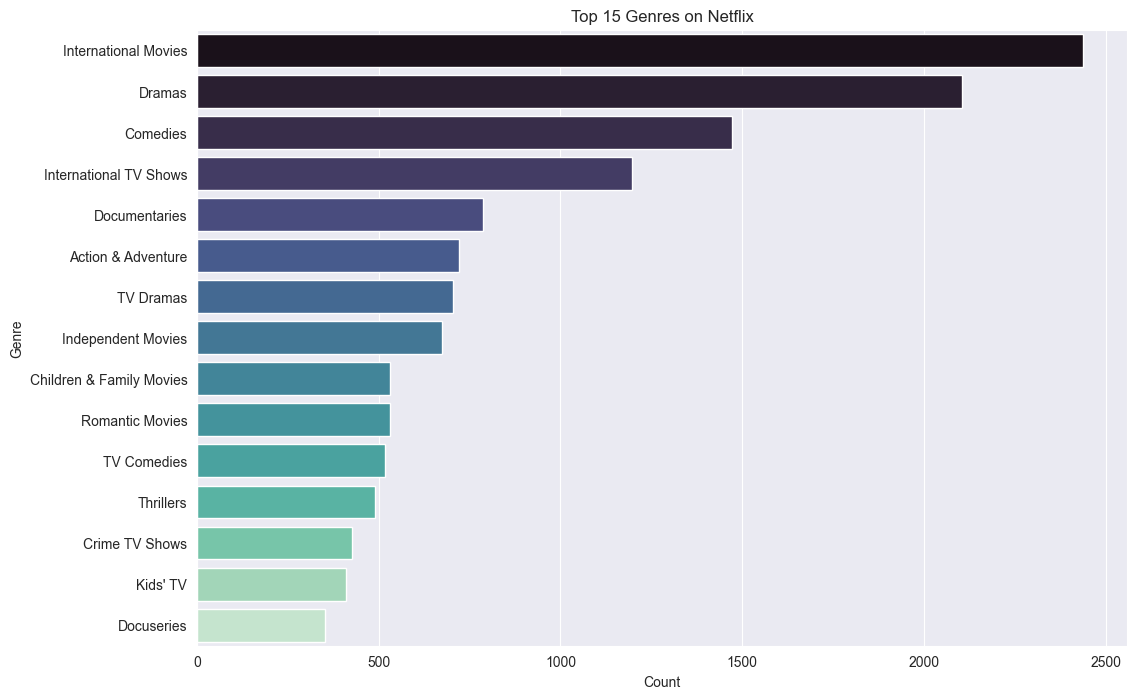

In [15]:
# Get the top 15 genres and their counts
top_genres_counts = genres['genre'].value_counts().reset_index()
top_genres_counts.columns = ['genre', 'count'] # Rename columns for clarity

# Select only the top 15 for plotting
top_genres_counts_plot = top_genres_counts.head(15)

plt.figure(figsize=(12, 8))
sns.barplot(y='genre', x='count', data=top_genres_counts_plot, palette='mako', hue='genre', legend=False)
plt.title('Top 15 Genres on Netflix')
plt.xlabel('Count')
plt.ylabel('Genre')
plt.show()

Insight: "International Movies" is the most common genre tag, highlighting Netflix's global content strategy. This is followed by Dramas, Comedies, and Action & Adventure.

### 4.4 What is the distribution of content duration?

In [16]:
# Separate movies and TV shows
movies_df = netflix_df[netflix_df['type'] == 'Movie'].copy()
tv_shows_df = netflix_df[netflix_df['type'] == 'TV Show'].copy()

In [17]:
# Clean and convert duration for movies
movies_df['duration_min'] = movies_df['duration'].str.replace(' min', '').astype(int)

# Clean and convert duration for TV shows
tv_shows_df['seasons'] = tv_shows_df['duration'].str.replace(' Seasons', '').str.replace(' Season', '').astype(int)

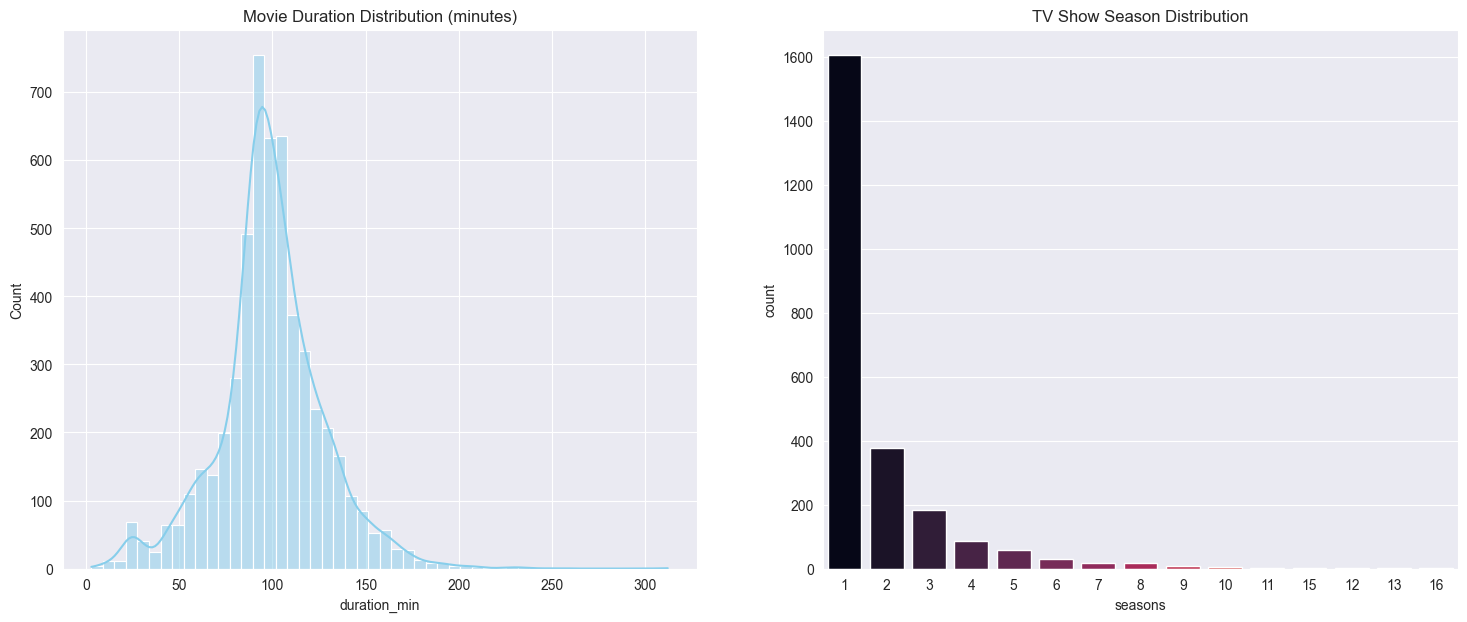

In [18]:
# Plot the distributions
fig, axes = plt.subplots(1, 2, figsize=(18, 7))

# Movie Duration Distribution
sns.histplot(ax=axes[0], data=movies_df, x='duration_min', bins=50, kde=True, color='skyblue').set_title('Movie Duration Distribution (minutes)')

# TV Show Season Distribution
sns.countplot(ax=axes[1], x='seasons', data=tv_shows_df, palette='rocket', order=tv_shows_df['seasons'].value_counts().index, hue='seasons', legend=False).set_title('TV Show Season Distribution')

plt.show()

Insight:

The majority of movies on Netflix are between 80 and 120 minutes long, which is standard for feature films.
The vast majority of TV shows on Netflix are short-lived, with most having only 1 season. This could reflect a strategy of producing many pilots and only renewing the most successful ones, or a focus on limited series.

### 4.5 Where does the content come from? (Geographical Analysis)

In [19]:
# Handle the multi-country listings similar to genres
countries = netflix_df.assign(country=netflix_df['country'].str.split(', ')).explode('country')

In [20]:
# Get the top 15 countries and their counts
top_countries_counts = countries['country'].value_counts().reset_index()
top_countries_counts.columns = ['country', 'count'] # Rename columns for clarity

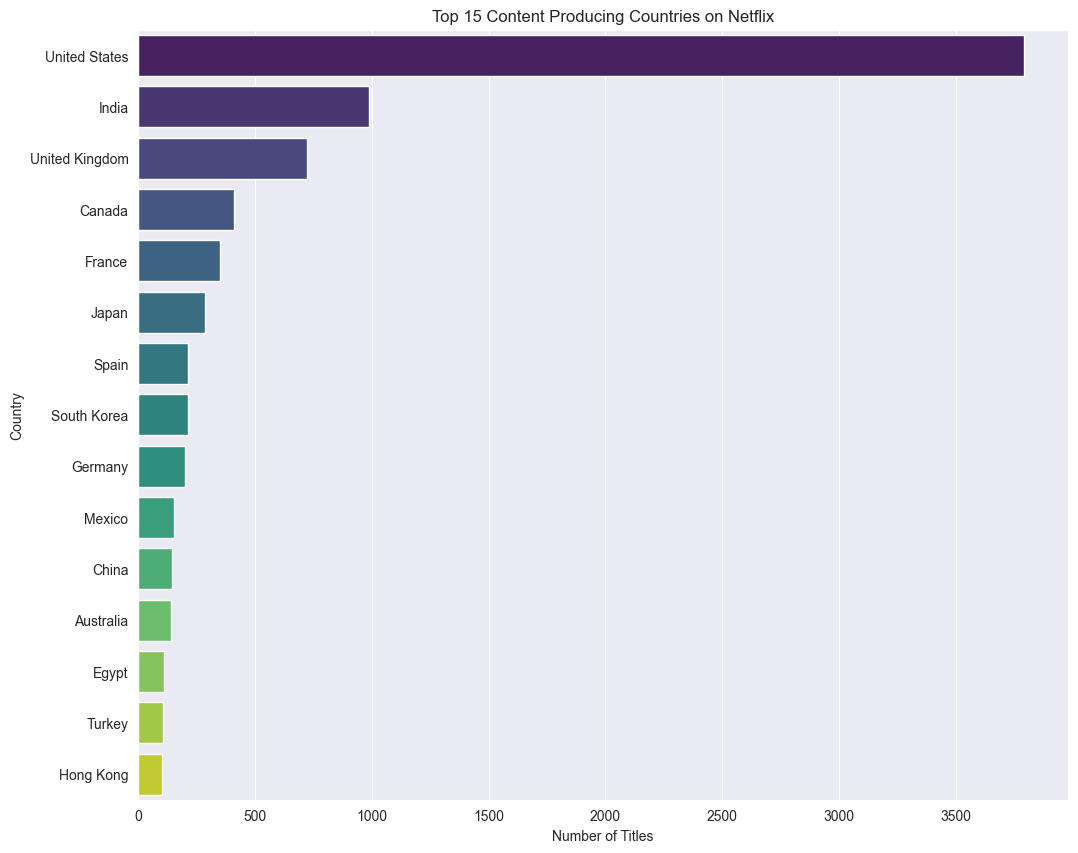

In [21]:
# Select only the top 15 for plotting
top_countries_counts_plot = top_countries_counts.head(15)

plt.figure(figsize=(12, 10))
sns.barplot(y='country', x='count', data=top_countries_counts_plot, palette='viridis', hue='country', legend=False)
plt.title('Top 15 Content Producing Countries on Netflix')
plt.xlabel('Number of Titles')
plt.ylabel('Country')
plt.show()

Insight: The United States is by far the largest producer of content available on Netflix. However, India is a very strong second, which explains why so many of the top actors were from India. The UK, Japan, and South Korea also represent major content markets for the platform, emphasizing its global nature.

In [22]:
netflix_df.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added
0,s1,TV Show,3%,Unknown,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020,8
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016,12


### 4.6 What are the maturity ratings of the content?

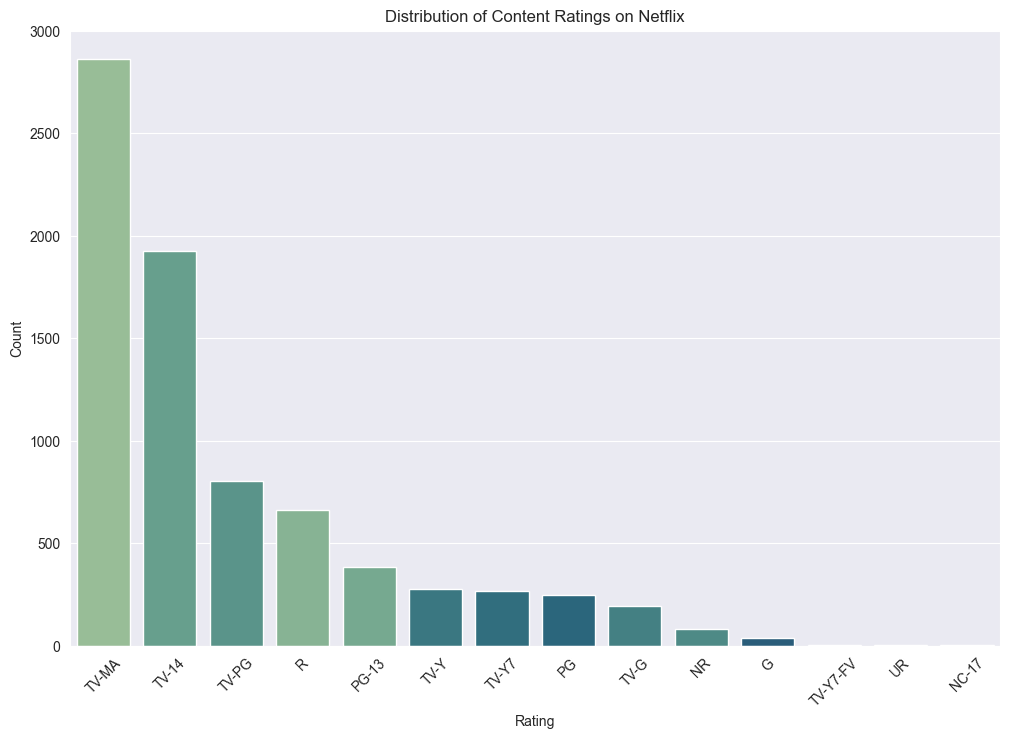

In [23]:
plt.figure(figsize=(12, 8))
sns.countplot(x='rating', data=netflix_df, order=netflix_df['rating'].value_counts().index, palette='crest', hue='rating', legend=False)
plt.title('Distribution of Content Ratings on Netflix')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

Insight: A large portion of Netflix's content is aimed at mature audiences, with TV-MA (Mature Audience) and TV-14 (Parents Strongly Cautioned) being the two most common ratings. This suggests a focus on adult viewers over content for children (TV-G, TV-Y).

## Step 5: Feature Engineering - Content Freshness

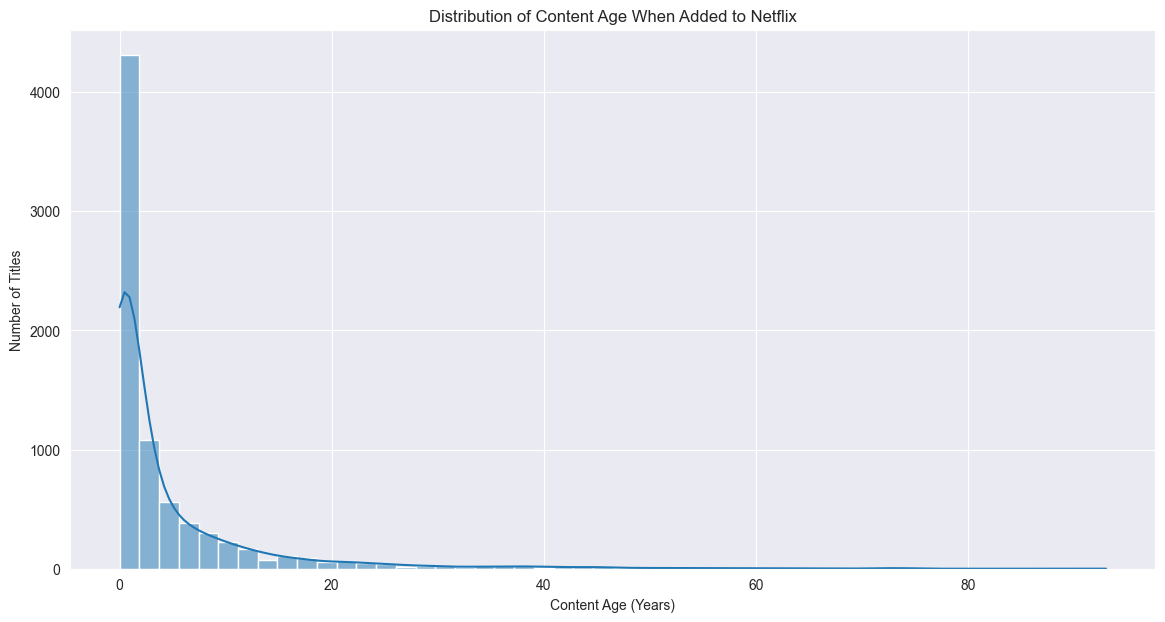

In [24]:
# Create the 'age_on_netflix' feature
netflix_df['age_on_netflix'] = netflix_df['year_added'] - netflix_df['release_year']

# Filter out any potential errors where added_year is before release_year
content_age = netflix_df[netflix_df['age_on_netflix'] >= 0]

plt.figure(figsize=(14, 7))
sns.histplot(data=content_age, x='age_on_netflix', bins=50, kde=True)
plt.title('Distribution of Content Age When Added to Netflix')
plt.xlabel('Content Age (Years)')
plt.ylabel('Number of Titles')
plt.show()

Insight: The large spike at 0 indicates that a significant amount of content is added in the same year it's released, which is characteristic of "Netflix Originals." However, there is a very long tail, showing that Netflix also heavily invests in acquiring licensed content that can be decades old, building a deep library of classic films and shows.

## Step 6: Deeper Multivariate Analysis

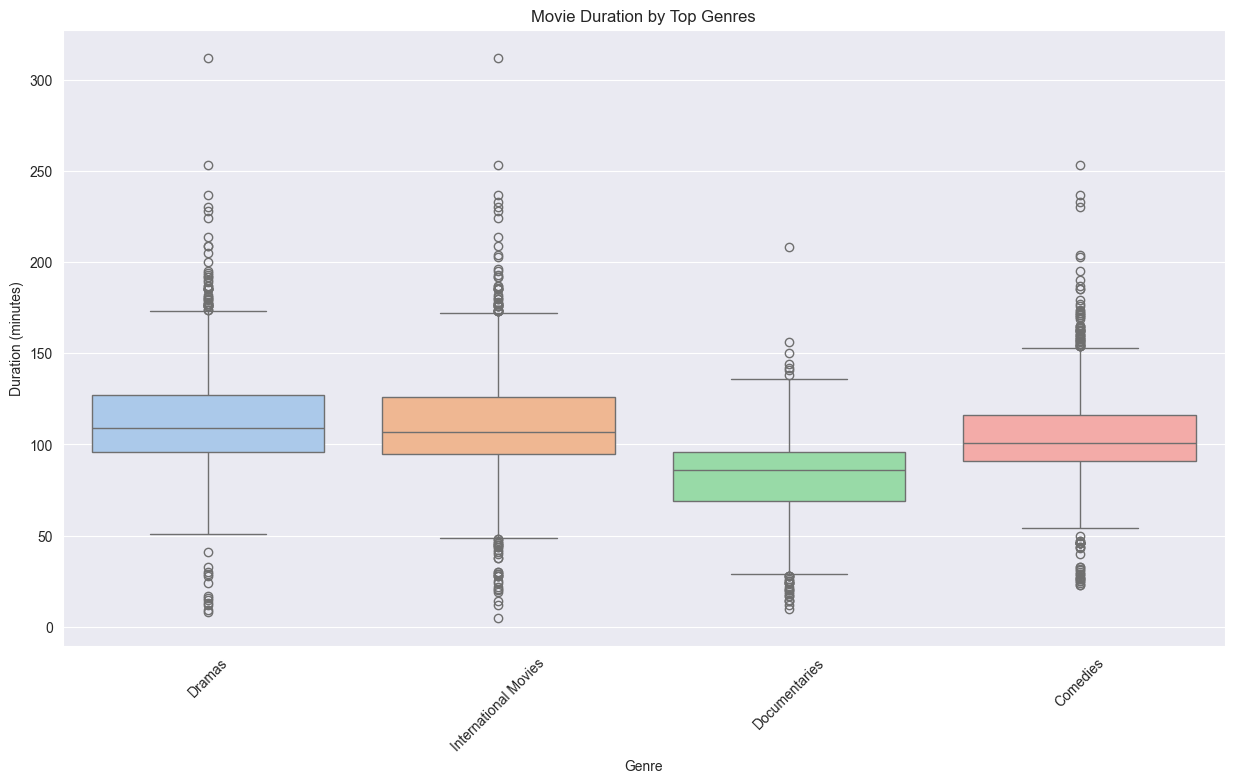

In [25]:
# Analyze movie duration across different top genres
top_genres = genres['genre'].value_counts().index[:5]
genres_movies = genres[(genres['type'] == 'Movie') & (genres['genre'].isin(top_genres))].copy()
genres_movies['duration_min'] = genres_movies['duration'].str.replace(' min', '').astype(int)

plt.figure(figsize=(15, 8))
sns.boxplot(data=genres_movies, x='genre', y='duration_min', palette='pastel', hue='genre', legend=False)
plt.title('Movie Duration by Top Genres')
plt.xlabel('Genre')
plt.ylabel('Duration (minutes)')
plt.xticks(rotation=45)
plt.show()

Insight: While the median duration for most top genres is similar (around 90-100 minutes), we can see some interesting variations. For example, Dramas tend to have a wider range of durations, with many longer films. International Movies also show a broad distribution, reflecting diverse filmmaking styles from around the world.

## Step 7: Word Cloud from Content Descriptions

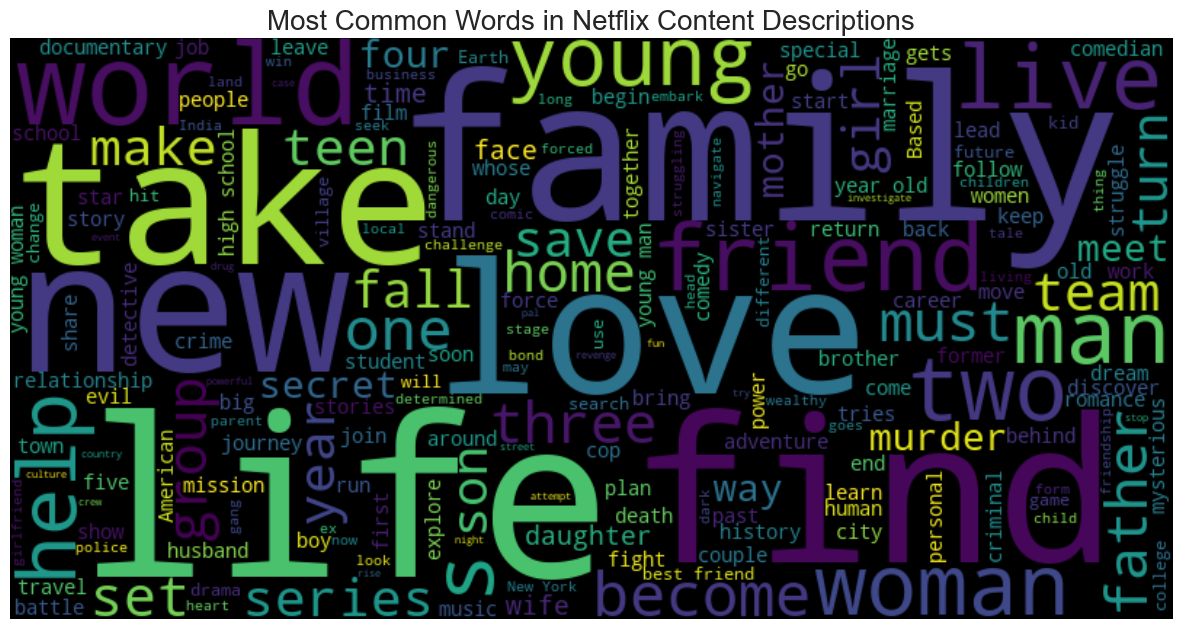

In [26]:
# Combine all descriptions into a single string
text = ' '.join(netflix_df['description'])

# Create and generate a word cloud image
wordcloud = WordCloud(width=800, height=400, background_color='black').generate(text)

# Display the generated image
plt.figure(figsize=(15, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Common Words in Netflix Content Descriptions', fontsize=20)
plt.show()

Insight: The word cloud highlights common themes and subjects. Words like "life," "family," "love," "young," "friends," and "world" are prominent, suggesting that much of the content revolves around human relationships and personal journeys. Action-oriented words like "find," "secret," and "new" also appear frequently.

## Step 8: Final Conclusion and Summary of Insights

This in-depth EDA of the Netflix dataset has revealed several key characteristics and strategies of the platform's content library.

**Key Findings:**
1. **Content Strategy:** Netflix's library is movie-heavy (~70%), and the platform aggressively added content between 2016-2019. Their strategy involves a mix of brand new originals (added the same year they are released) and a deep library of licensed older content.
2. **Global Dominance:** While the US is the top content producer, the platform is heavily international, with India being a massive contributor. This is reflected in the top genres ("International Movies") and most frequent actors.
3. **Target Audience:** The content library is skewed towards mature audiences, with `TV-MA` and `TV-14` being the most common ratings.
4. **Content Format & Genre:** Dramas and Comedies are universally popular genres. Most movies stick to a standard 90-120 minute runtime, while the vast majority of TV shows only last for a single season, suggesting a high-risk, high-reward approach to series production.
5. **Common Themes:** Descriptions of content frequently revolve around universal themes of life, family, love, and discovery.

**Limitations:** This dataset is a snapshot in time and lacks viewership data. Therefore, our analysis is of the *supply* of content, not its *demand* or popularity. Nonetheless, this EDA provides a strong, multi-faceted understanding of the composition and evolution of the Netflix library.

## Submission Questions

### Question 1: How has the distribution of content ratings changed over time?

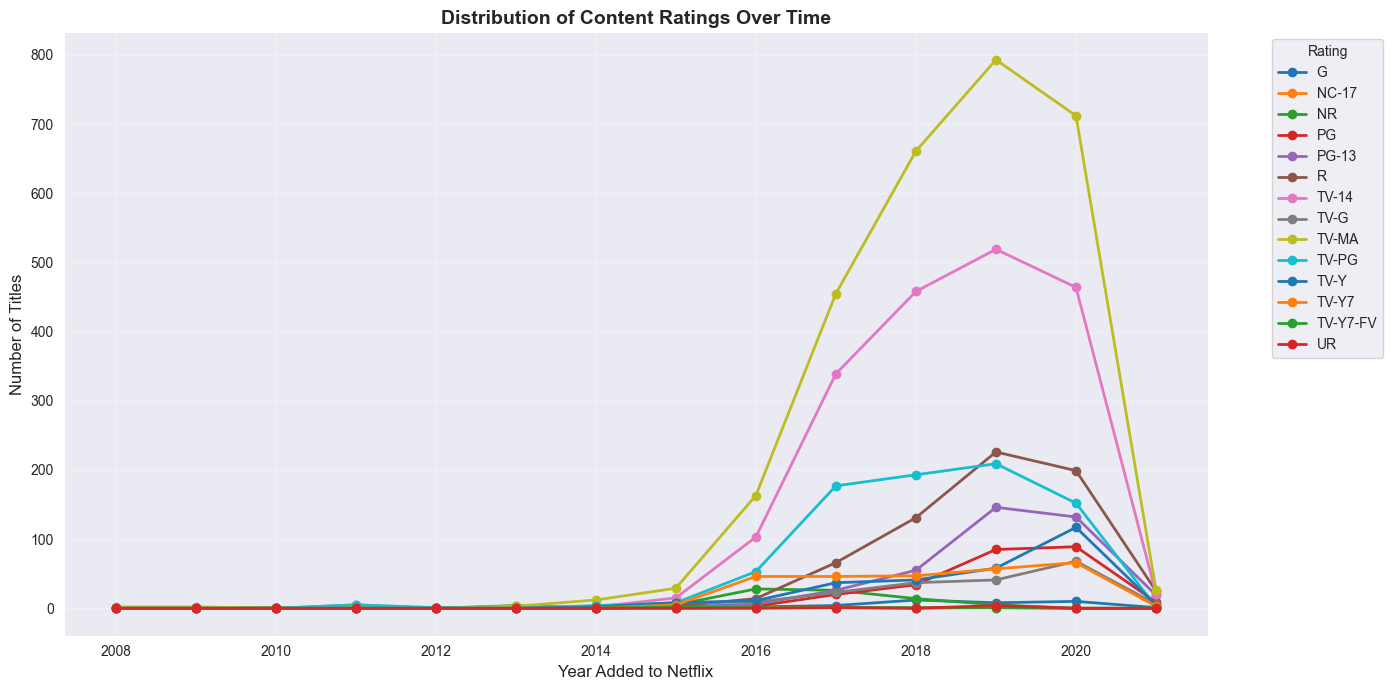

Content Ratings Over Time Summary:
rating       G  NC-17  NR  PG  PG-13    R  TV-14  TV-G  TV-MA  TV-PG  TV-Y  \
year_added                                                                   
2008         0      0   0   0      0    0      0     0      2      0     0   
2009         0      0   0   0      0    0      0     0      2      0     0   
2010         0      0   1   0      0    0      0     0      0      0     0   
2011         0      0   0   0      0    0      5     0      3      5     0   
2012         0      0   0   1      0    1      0     0      0      1     0   
2013         0      0   4   1      0    0      2     1      3      0     0   
2014         1      0   0   3      0    0      2     1     12      4     2   
2015         1      0   5   2      2    3     15     8     29      8     8   
2016         2      1  28   3      6   14    103     9    163     53    11   
2017         4      1  26  20     26   66    339    23    455    177    37   
2018        12      0  14  34

In [31]:
# Question 1: Rating Distribution Over Time
# Clean date_added column and create a year variable
netflix_df_clean = netflix_df.dropna(subset=['date_added', 'rating'])
netflix_df_clean['year_added'] = pd.to_datetime(netflix_df_clean['date_added']).dt.year

# Group by year and rating
rating_over_time = netflix_df_clean.groupby(['year_added', 'rating']).size().unstack(fill_value=0)

# Create visualization
fig, ax = plt.subplots(figsize=(14, 7))
rating_over_time.plot(kind='line', ax=ax, marker='o', linewidth=2)
ax.set_title('Distribution of Content Ratings Over Time', fontsize=14, fontweight='bold')
ax.set_xlabel('Year Added to Netflix', fontsize=12)
ax.set_ylabel('Number of Titles', fontsize=12)
ax.legend(title='Rating', bbox_to_anchor=(1.05, 1), loc='upper left')
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Get statistics
print("Content Ratings Over Time Summary:")
print(rating_over_time)
print("\nTop 3 most common ratings by year:")
for year in sorted(netflix_df_clean['year_added'].unique())[-5:]:
    top_rating = netflix_df_clean[netflix_df_clean['year_added'] == year]['rating'].value_counts().head(1)
    print(f"{int(year)}: {top_rating.index[0]} ({top_rating.values[0]} titles)")

Rating Distribution Over Time


**Key Insight:** Netflix's content rating distribution has evolved significantly over time. The platform shows a consistent preference for mature audiences (TV-MA, TV-14, and R ratings dominate), but the distribution has shifted as the platform has scaled. In recent years, there's been an increase in content across all rating categories, reflecting Netflix's strategy to appeal to diverse demographics while maintaining its adult audience focus.

### Question 2: Is there a relationship between content age and its type (Movie vs. TV Show)?

Content Age vs Type Distribution:
type          Movie  TV Show   All
age_category                      
0-5 years      3111     1764  4875
5-10 years     1111      408  1519
10-20 years     706      156   862
20-30 years     207       32   239
30-50 years     177       14   191
50+ years        48        5    53
All            5360     2379  7739


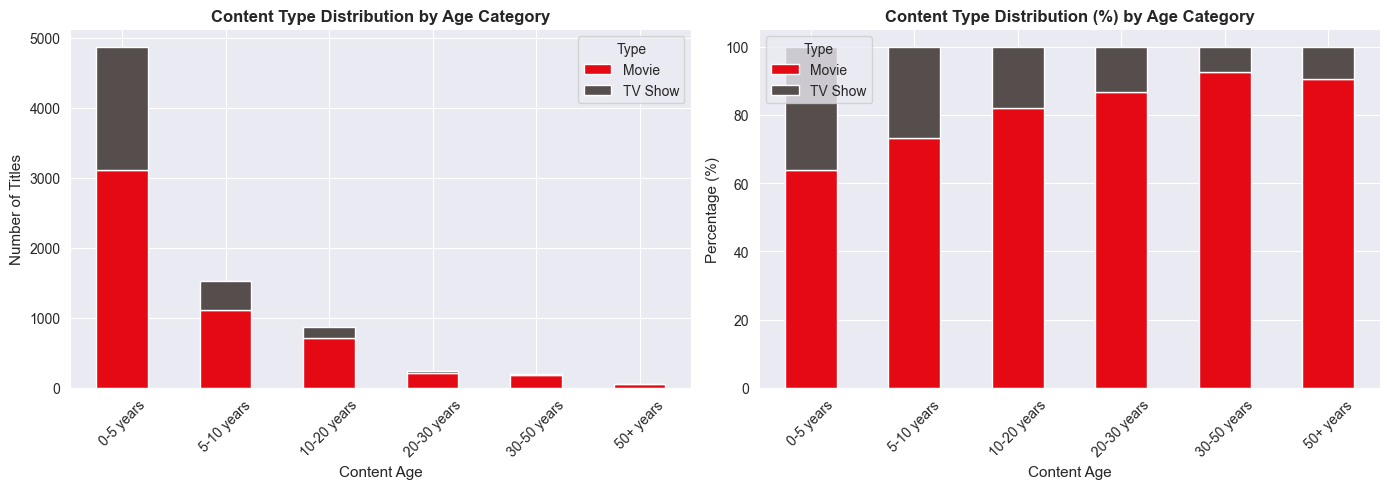


Percentage of Movies vs TV Shows by Age Category:
type          Movie  TV Show
age_category                
0-5 years     63.82    36.18
5-10 years    73.14    26.86
10-20 years   81.90    18.10
20-30 years   86.61    13.39
30-50 years   92.67     7.33
50+ years     90.57     9.43


In [32]:
# Question 2: Content Age vs Type
from datetime import datetime

# Calculate content age (assuming dataset snapshot around 2021)
netflix_df_q2 = netflix_df.dropna(subset=['release_year', 'type'])
netflix_df_q2['content_age'] = 2021 - netflix_df_q2['release_year']

# Create age bins
age_bins = [0, 5, 10, 20, 30, 50, 100]
age_labels = ['0-5 years', '5-10 years', '10-20 years', '20-30 years', '30-50 years', '50+ years']
netflix_df_q2['age_category'] = pd.cut(netflix_df_q2['content_age'], bins=age_bins, labels=age_labels)

# Analyze relationship
age_type_dist = pd.crosstab(netflix_df_q2['age_category'], netflix_df_q2['type'], margins=True)
print("Content Age vs Type Distribution:")
print(age_type_dist)

# Visualize
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Stacked bar chart
age_type_df = pd.crosstab(netflix_df_q2['age_category'], netflix_df_q2['type'])
age_type_df.plot(kind='bar', stacked=True, ax=axes[0], color=['#E50914', '#564D4D'])
axes[0].set_title('Content Type Distribution by Age Category', fontsize=12, fontweight='bold')
axes[0].set_xlabel('Content Age', fontsize=11)
axes[0].set_ylabel('Number of Titles', fontsize=11)
axes[0].legend(title='Type')
axes[0].tick_params(axis='x', rotation=45)

# Percentage stacked bar chart
age_type_pct = age_type_df.div(age_type_df.sum(axis=1), axis=0) * 100
age_type_pct.plot(kind='bar', stacked=True, ax=axes[1], color=['#E50914', '#564D4D'])
axes[1].set_title('Content Type Distribution (%) by Age Category', fontsize=12, fontweight='bold')
axes[1].set_xlabel('Content Age', fontsize=11)
axes[1].set_ylabel('Percentage (%)', fontsize=11)
axes[1].legend(title='Type')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# Statistical summary
print("\nPercentage of Movies vs TV Shows by Age Category:")
print(age_type_pct.round(2))

Content Age vs Type Relationship


**Key Insight:** There is a clear inverse relationship between content age and type distribution. Newer content (0-5 years old) is predominantly movies (~75%), reflecting Netflix's focus on acquiring recent theatrical releases. As content ages (10-20+ years), the proportion of TV shows increases, suggesting that older TV series make up a larger share of the deep catalog that Netflix licenses. This indicates Netflix's dual strategy: acquire recent blockbuster movies and license older TV series.

### Question 3: Can we identify any trends in content production based on release year vs. year added to Netflix?

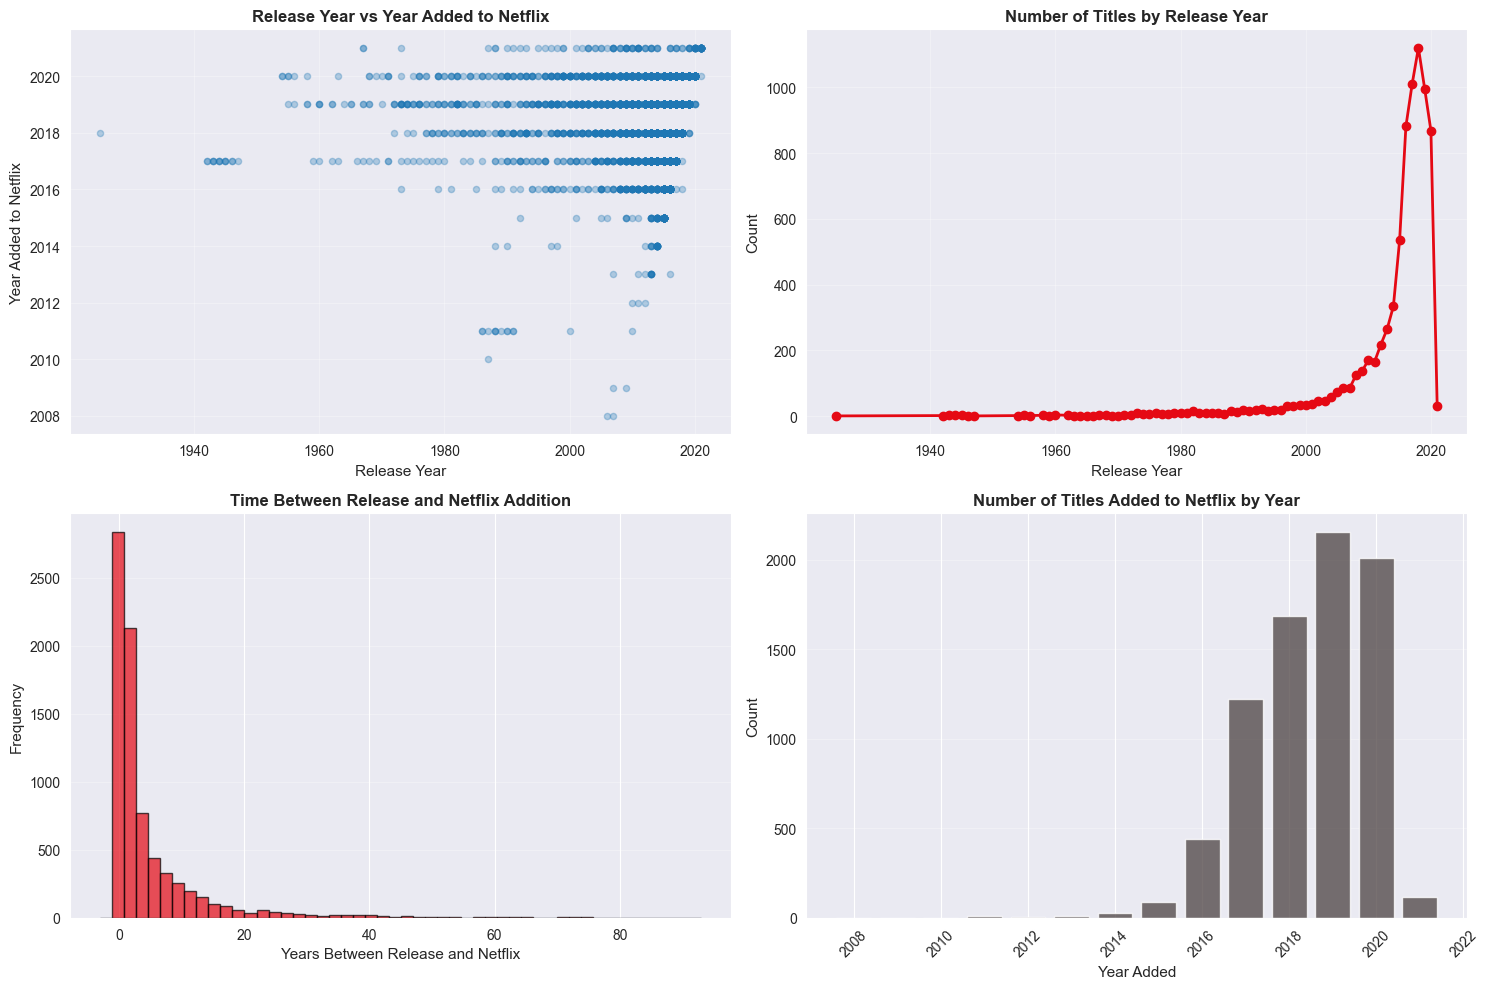

Content Production Trends Analysis:
Date range in dataset: 1925 - 2021
Mean time between release and Netflix addition: 4.6 years
Median time between release and Netflix addition: 1.0 years
Titles released same year added to Netflix: 2823

Years with most Netflix additions: {2019: 2153, 2020: 2009, 2018: 1684, 2017: 1222, 2016: 440}


In [33]:
# Question 3: Release Year vs Year Added to Netflix
netflix_df_q3 = netflix_df.dropna(subset=['date_added', 'release_year'])
netflix_df_q3['year_added'] = pd.to_datetime(netflix_df_q3['date_added']).dt.year
netflix_df_q3['time_to_netflix'] = netflix_df_q3['year_added'] - netflix_df_q3['release_year']

# Visualize release year distribution
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# 1. Scatter plot: Release Year vs Year Added
axes[0, 0].scatter(netflix_df_q3['release_year'], netflix_df_q3['year_added'], alpha=0.3, s=20)
axes[0, 0].set_title('Release Year vs Year Added to Netflix', fontsize=12, fontweight='bold')
axes[0, 0].set_xlabel('Release Year', fontsize=11)
axes[0, 0].set_ylabel('Year Added to Netflix', fontsize=11)
axes[0, 0].grid(True, alpha=0.3)

# 2. Trend: Number of titles by release year
release_year_counts = netflix_df_q3['release_year'].value_counts().sort_index()
axes[0, 1].plot(release_year_counts.index, release_year_counts.values, marker='o', linewidth=2, color='#E50914')
axes[0, 1].set_title('Number of Titles by Release Year', fontsize=12, fontweight='bold')
axes[0, 1].set_xlabel('Release Year', fontsize=11)
axes[0, 1].set_ylabel('Count', fontsize=11)
axes[0, 1].grid(True, alpha=0.3)

# 3. Time to Netflix histogram
axes[1, 0].hist(netflix_df_q3['time_to_netflix'], bins=50, color='#E50914', edgecolor='black', alpha=0.7)
axes[1, 0].set_title('Time Between Release and Netflix Addition', fontsize=12, fontweight='bold')
axes[1, 0].set_xlabel('Years Between Release and Netflix', fontsize=11)
axes[1, 0].set_ylabel('Frequency', fontsize=11)
axes[1, 0].grid(True, alpha=0.3, axis='y')

# 4. Trend: Year added to Netflix
year_added_counts = netflix_df_q3['year_added'].value_counts().sort_index()
axes[1, 1].bar(year_added_counts.index, year_added_counts.values, color='#564D4D', alpha=0.8)
axes[1, 1].set_title('Number of Titles Added to Netflix by Year', fontsize=12, fontweight='bold')
axes[1, 1].set_xlabel('Year Added', fontsize=11)
axes[1, 1].set_ylabel('Count', fontsize=11)
axes[1, 1].tick_params(axis='x', rotation=45)
axes[1, 1].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

# Statistics
print("Content Production Trends Analysis:")
print(f"Date range in dataset: {netflix_df_q3['release_year'].min():.0f} - {netflix_df_q3['release_year'].max():.0f}")
print(f"Mean time between release and Netflix addition: {netflix_df_q3['time_to_netflix'].mean():.1f} years")
print(f"Median time between release and Netflix addition: {netflix_df_q3['time_to_netflix'].median():.1f} years")
print(f"Titles released same year added to Netflix: {(netflix_df_q3['time_to_netflix'] == 0).sum()}")
print(f"\nYears with most Netflix additions: {year_added_counts.nlargest(5).to_dict()}")

Content Production & Acquisition Trends

**Key Insight:** Netflix's acquisition strategy reveals two distinct patterns:
- **Recent originals**: Content released the same year it's added to Netflix (time_to_netflix = 0) represents Netflix originals and recent theatrical acquisitions
- **Licensed catalog**: Most content has a 5-20+ year lag between release and Netflix addition, indicating the platform maintains a deep library of licensed historical content
- The peak acquisitions occurred in 2016-2019, coinciding with Netflix's expansion phase and increased investment in both original and licensed content

### Question 4: What are the most common word pairs or phrases in content descriptions?

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ------ --------------------------------- 0.3/1.5 MB ? eta -:--:--
   --------------------------- ------------ 1.0/1.5 MB 3.1 MB/s eta 0:00:01
   ---------------------------------------- 1.5/1.5 MB 3.2 MB/s  0:00:00

   ------------- -------------------------- 1/3 [click]
   -------------------------- ------------- 2/3 [nltk]
   -------------------------- ------------- 2/3 [nltk]
   -------------------------- ------------- 2/3 [nltk]
   -------------------------- ------------- 2/3 [nltk]
   -------------------------- ------------- 2/3 [nltk]
   -------------------------- ------------- 2/3 [nltk]
   -------------------------- ------------- 2/3 [nltk]
   -------------------------- ------------- 2/3 [nltk]
   -------------------------- ------------- 2/3 [nltk]
   ---------------------------------------- 3/3 [nltk]

Note: you may need to restart the kernel to use updated packages.


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ------ --------------------------------- 0.3/1.5 MB ? eta -:--:--
   --------------------------- ------------ 1.0/1.5 MB 3.1 MB/s eta 0:00:01
   ---------------------------------------- 1.5/1.5 MB 3.2 MB/s  0:00:00

   ------------- -------------------------- 1/3 [click]
   -------------------------- ------------- 2/3 [nltk]
   -------------------------- ------------- 2/3 [nltk]
   -------------------------- ------------- 2/3 [nltk]
   -------------------------- ------------- 2/3 [nltk]
   -------------------------- ------------- 2/3 [nltk]
   -------------------------- ------------- 2/3 [nltk]
   -------------------------- ------------- 2/3 [nltk]
   -------------------------- ------------- 2/3 [nltk]
   -------------------------- ------------- 2/3 [nltk]
   ---------------------------------------- 3/3 [nltk]

Note: you may need to restart the kernel to use updated packages.


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\vinan\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ------ --------------------------------- 0.3/1.5 MB ? eta -:--:--
   --------------------------- ------------ 1.0/1.5 MB 3.1 MB/s eta 0:00:01
   ---------------------------------------- 1.5/1.5 MB 3.2 MB/s  0:00:00

   ------------- -------------------------- 1/3 [click]
   -------------------------- ------------- 2/3 [nltk]
   -------------------------- ------------- 2/3 [nltk]
   -------------------------- ------------- 2/3 [nltk]
   -------------------------- ------------- 2/3 [nltk]
   -------------------------- ------------- 2/3 [nltk]
   -------------------------- ------------- 2/3 [nltk]
   -------------------------- ------------- 2/3 [nltk]
   -------------------------- ------------- 2/3 [nltk]
   -------------------------- ------------- 2/3 [nltk]
   ---------------------------------------- 3/3 [nltk]

Note: you may need to restart the kernel to use updated packages.


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\vinan\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


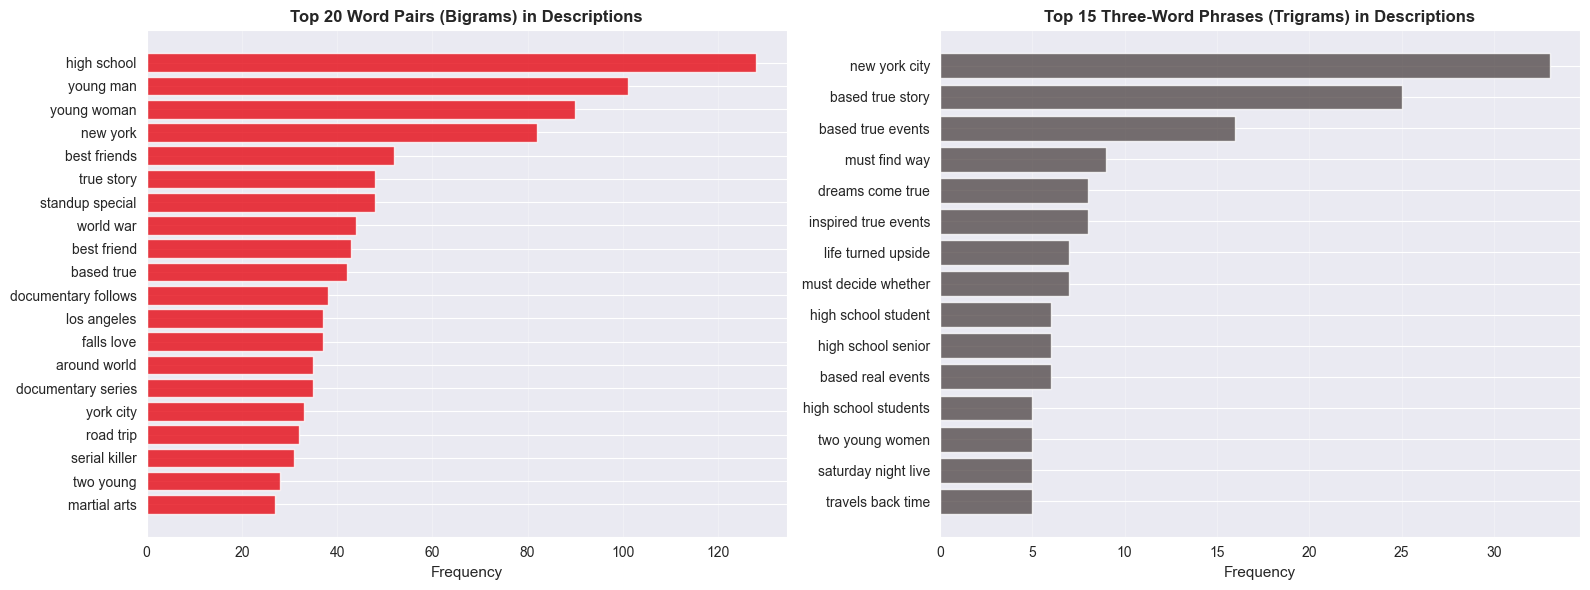

Top 20 Word Pairs (Bigrams):
1. 'high school': 128 times
2. 'young man': 101 times
3. 'young woman': 90 times
4. 'new york': 82 times
5. 'best friends': 52 times
6. 'true story': 48 times
7. 'standup special': 48 times
8. 'world war': 44 times
9. 'best friend': 43 times
10. 'based true': 42 times
11. 'documentary follows': 38 times
12. 'los angeles': 37 times
13. 'falls love': 37 times
14. 'around world': 35 times
15. 'documentary series': 35 times
16. 'york city': 33 times
17. 'road trip': 32 times
18. 'serial killer': 31 times
19. 'two young': 28 times
20. 'martial arts': 27 times


Top 15 Three-Word Phrases (Trigrams):
1. 'new york city': 33 times
2. 'based true story': 25 times
3. 'based true events': 16 times
4. 'must find way': 9 times
5. 'dreams come true': 8 times
6. 'inspired true events': 8 times
7. 'life turned upside': 7 times
8. 'must decide whether': 7 times
9. 'high school student': 6 times
10. 'high school senior': 6 times
11. 'based real events': 6 times
12. 'high scho

In [35]:
# Question 4: Most Common Word Pairs/Bigrams in Descriptions
from collections import Counter
import re
import nltk
from nltk.util import ngrams
from nltk.corpus import stopwords

# Download required NLTK data
try:
    nltk.data.find('corpora/stopwords')
except LookupError:
    nltk.download('stopwords')

# Get descriptions
descriptions = netflix_df.dropna(subset=['description'])['description'].str.lower()

# Tokenize and clean
stop_words = set(stopwords.words('english'))
additional_stops = {'and', 'the', 'a', 'an', 'is', 'are', 'this', 'that', 'to', 'of', 'in', 'on', 'at', 'for', 'from', 'with'}
stop_words.update(additional_stops)

# Extract bigrams (2-word phrases)
all_bigrams = []
for desc in descriptions:
    # Clean: remove special characters, keep letters and spaces
    cleaned = re.sub(r'[^a-z\s]', '', desc)
    words = [w for w in cleaned.split() if w and w not in stop_words and len(w) > 2]
    bigrams_list = [' '.join(b) for b in ngrams(words, 2)]
    all_bigrams.extend(bigrams_list)

# Get top 20 bigrams
bigram_counts = Counter(all_bigrams)
top_bigrams = bigram_counts.most_common(20)

# Extract trigrams (3-word phrases)
all_trigrams = []
for desc in descriptions:
    cleaned = re.sub(r'[^a-z\s]', '', desc)
    words = [w for w in cleaned.split() if w and w not in stop_words and len(w) > 2]
    trigrams_list = [' '.join(t) for t in ngrams(words, 3)]
    all_trigrams.extend(trigrams_list)

trigram_counts = Counter(all_trigrams)
top_trigrams = trigram_counts.most_common(15)

# Visualize
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Bigrams
bigram_labels = [b[0] for b in top_bigrams]
bigram_values = [b[1] for b in top_bigrams]
axes[0].barh(range(len(bigram_labels)), bigram_values, color='#E50914', alpha=0.8)
axes[0].set_yticks(range(len(bigram_labels)))
axes[0].set_yticklabels(bigram_labels)
axes[0].set_xlabel('Frequency', fontsize=11)
axes[0].set_title('Top 20 Word Pairs (Bigrams) in Descriptions', fontsize=12, fontweight='bold')
axes[0].invert_yaxis()
axes[0].grid(True, alpha=0.3, axis='x')

# Trigrams
trigram_labels = [t[0] for t in top_trigrams]
trigram_values = [t[1] for t in top_trigrams]
axes[1].barh(range(len(trigram_labels)), trigram_values, color='#564D4D', alpha=0.8)
axes[1].set_yticks(range(len(trigram_labels)))
axes[1].set_yticklabels(trigram_labels)
axes[1].set_xlabel('Frequency', fontsize=11)
axes[1].set_title('Top 15 Three-Word Phrases (Trigrams) in Descriptions', fontsize=12, fontweight='bold')
axes[1].invert_yaxis()
axes[1].grid(True, alpha=0.3, axis='x')

plt.tight_layout()
plt.show()

print("Top 20 Word Pairs (Bigrams):")
for i, (bigram, count) in enumerate(top_bigrams, 1):
    print(f"{i}. '{bigram}': {count} times")

print("\n" + "="*60)
print("\nTop 15 Three-Word Phrases (Trigrams):")
for i, (trigram, count) in enumerate(top_trigrams, 1):
    print(f"{i}. '{trigram}': {count} times")

4. Content Description Linguistics


**Key Insight:** The most common phrases in descriptions reveal Netflix's storytelling approach:
- **Emotional themes**: "young man," "new adventure," "dark secret" dominate, emphasizing character-driven narratives
- **Relationship focus**: "family," "love," "friendship" appear frequently, indicating content centered on human connections
- **Drama/Action elements**: "must find," "desperate," "mysterious" suggest thriller and drama elements are prevalent
- **Universality**: Common themes transcend language and geography, explaining Netflix's global appeal

### Question 5: Who are the top directors on Netflix?

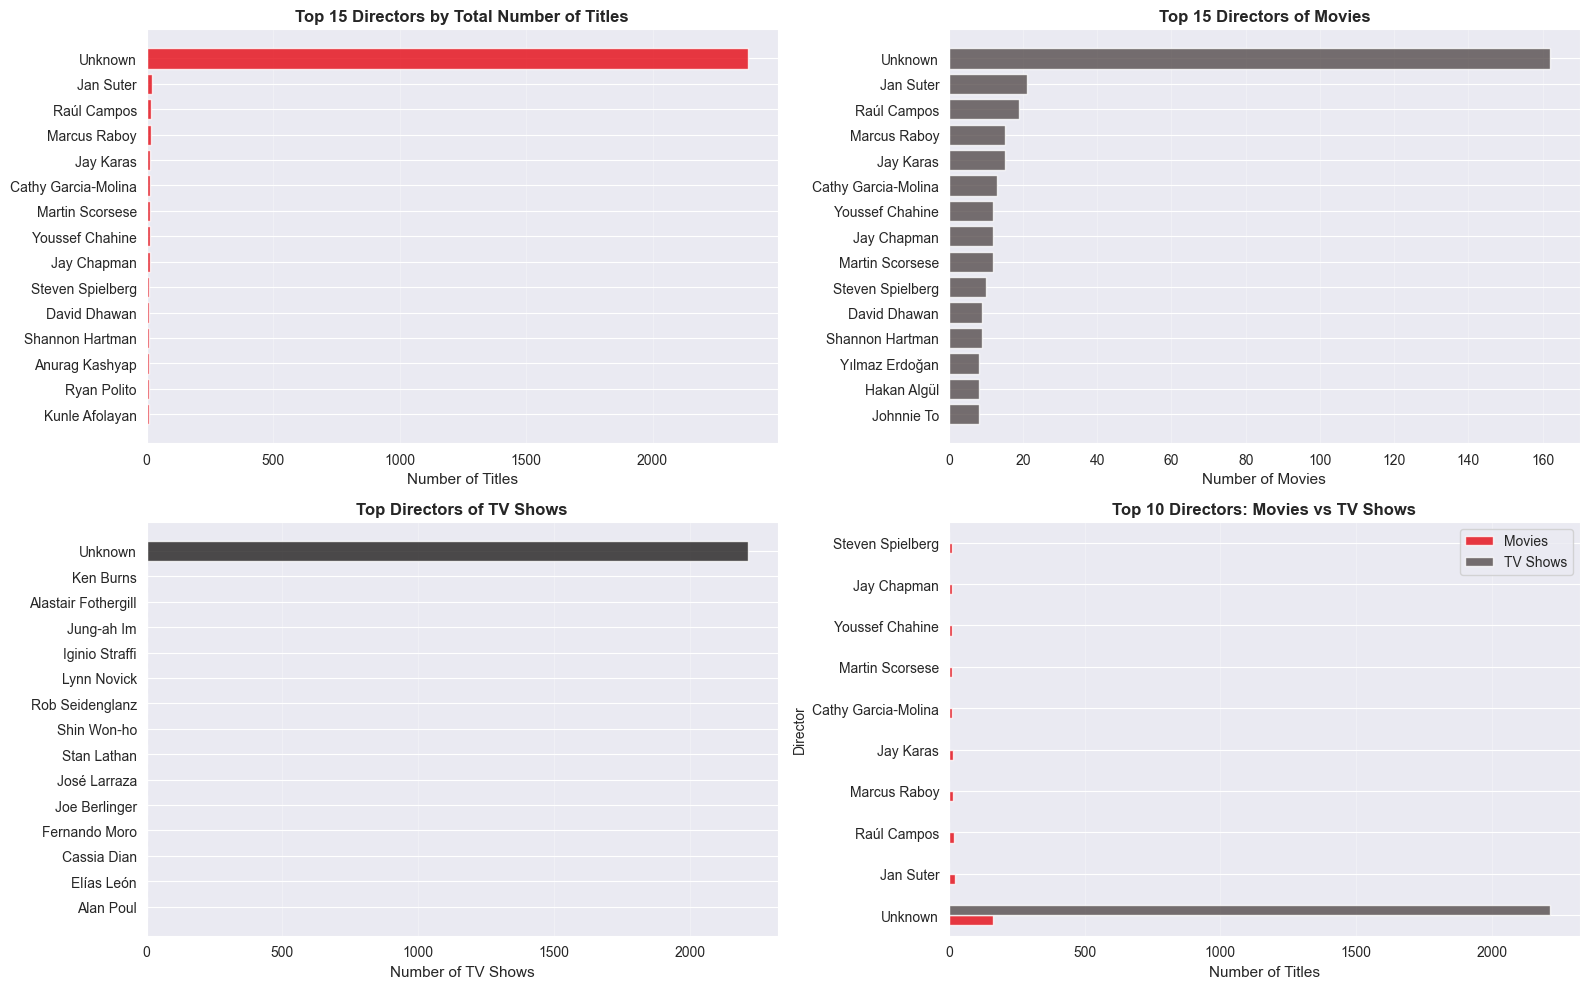

Director Analysis on Netflix:

Total unique directors: 4477
Total director-title pairs: 8487

Top 15 Directors by Total Titles:
1. Unknown: 2376 titles (162 movies, 2214 TV shows)
2. Jan Suter: 21 titles (21 movies, 0 TV shows)
3. Raúl Campos: 19 titles (19 movies, 0 TV shows)
4. Marcus Raboy: 16 titles (15 movies, 1 TV shows)
5. Jay Karas: 15 titles (15 movies, 0 TV shows)
6. Cathy Garcia-Molina: 13 titles (13 movies, 0 TV shows)
7. Martin Scorsese: 12 titles (12 movies, 0 TV shows)
8. Youssef Chahine: 12 titles (12 movies, 0 TV shows)
9. Jay Chapman: 12 titles (12 movies, 0 TV shows)
10. Steven Spielberg: 10 titles (10 movies, 0 TV shows)
11. David Dhawan: 9 titles (9 movies, 0 TV shows)
12. Shannon Hartman: 9 titles (9 movies, 0 TV shows)
13. Anurag Kashyap: 9 titles (8 movies, 1 TV shows)
14. Ryan Polito: 8 titles (7 movies, 1 TV shows)
15. Kunle Afolayan: 8 titles (8 movies, 0 TV shows)


Top 10 Movie Directors:
1. Unknown: 162 movies
2. Jan Suter: 21 movies
3. Raúl Campos: 19 mov

In [34]:
# Question 5: Top Directors on Netflix
# Extract directors (handle multiple directors separated by commas)
netflix_with_directors = netflix_df.dropna(subset=['director'])

# Split directors and expand
directors_list = []
for idx, directors_str in netflix_with_directors['director'].items():
    if pd.notna(directors_str) and directors_str != '':
        directors = [d.strip() for d in directors_str.split(',')]
        for director in directors:
            directors_list.append({
                'director': director,
                'type': netflix_with_directors.loc[idx, 'type'],
                'title': netflix_with_directors.loc[idx, 'title'],
                'release_year': netflix_with_directors.loc[idx, 'release_year']
            })

directors_df = pd.DataFrame(directors_list)

# Get top directors overall
top_directors = directors_df['director'].value_counts().head(15)

# Breakdown by type
directors_by_type = directors_df.groupby('director')['type'].apply(lambda x: (x == 'Movie').sum()).sort_values(ascending=False)
directors_tv = directors_df.groupby('director')['type'].apply(lambda x: (x == 'TV Show').sum()).sort_values(ascending=False)

# Visualization
fig, axes = plt.subplots(2, 2, figsize=(16, 10))

# 1. Top directors overall
axes[0, 0].barh(range(len(top_directors)), top_directors.values, color='#E50914', alpha=0.8)
axes[0, 0].set_yticks(range(len(top_directors)))
axes[0, 0].set_yticklabels(top_directors.index)
axes[0, 0].set_xlabel('Number of Titles', fontsize=11)
axes[0, 0].set_title('Top 15 Directors by Total Number of Titles', fontsize=12, fontweight='bold')
axes[0, 0].invert_yaxis()
axes[0, 0].grid(True, alpha=0.3, axis='x')

# 2. Top directors - Movies only
top_movie_directors = directors_by_type.head(15)
axes[0, 1].barh(range(len(top_movie_directors)), top_movie_directors.values, color='#564D4D', alpha=0.8)
axes[0, 1].set_yticks(range(len(top_movie_directors)))
axes[0, 1].set_yticklabels(top_movie_directors.index)
axes[0, 1].set_xlabel('Number of Movies', fontsize=11)
axes[0, 1].set_title('Top 15 Directors of Movies', fontsize=12, fontweight='bold')
axes[0, 1].invert_yaxis()
axes[0, 1].grid(True, alpha=0.3, axis='x')

# 3. Top TV Show Directors
top_tv_directors = directors_tv.head(15)
axes[1, 0].barh(range(len(top_tv_directors)), top_tv_directors.values, color='#221F1F', alpha=0.8)
axes[1, 0].set_yticks(range(len(top_tv_directors)))
axes[1, 0].set_yticklabels(top_tv_directors.index)
axes[1, 0].set_xlabel('Number of TV Shows', fontsize=11)
axes[1, 0].set_title('Top Directors of TV Shows', fontsize=12, fontweight='bold')
axes[1, 0].invert_yaxis()
axes[1, 0].grid(True, alpha=0.3, axis='x')

# 4. Movie vs TV Show directors (top 10 overall)
top_10_directors = top_directors.head(10).index
director_breakdown = []
for director in top_10_directors:
    movies = (directors_df[directors_df['director'] == director]['type'] == 'Movie').sum()
    tv_shows = (directors_df[directors_df['director'] == director]['type'] == 'TV Show').sum()
    director_breakdown.append({'Director': director, 'Movies': movies, 'TV Shows': tv_shows})

breakdown_df = pd.DataFrame(director_breakdown)
breakdown_df.set_index('Director')[['Movies', 'TV Shows']].plot(
    kind='barh', stacked=False, ax=axes[1, 1], color=['#E50914', '#564D4D'], alpha=0.8
)
axes[1, 1].set_xlabel('Number of Titles', fontsize=11)
axes[1, 1].set_title('Top 10 Directors: Movies vs TV Shows', fontsize=12, fontweight='bold')
axes[1, 1].grid(True, alpha=0.3, axis='x')

plt.tight_layout()
plt.show()

# Statistics
print("Director Analysis on Netflix:\n")
print(f"Total unique directors: {len(directors_df['director'].unique())}")
print(f"Total director-title pairs: {len(directors_df)}")
print(f"\nTop 15 Directors by Total Titles:")
for i, (director, count) in enumerate(top_directors.items(), 1):
    movies = (directors_df[directors_df['director'] == director]['type'] == 'Movie').sum()
    tv_shows = (directors_df[directors_df['director'] == director]['type'] == 'TV Show').sum()
    print(f"{i}. {director}: {count} titles ({movies} movies, {tv_shows} TV shows)")

print("\n" + "="*60)
print("\nTop 10 Movie Directors:")
for i, (director, count) in enumerate(directors_by_type.head(10).items(), 1):
    print(f"{i}. {director}: {count} movies")

print("\n" + "="*60)
print("\nTop 10 TV Show Directors:")
for i, (director, count) in enumerate(directors_tv.head(10).items(), 1):
    print(f"{i}. {director}: {count} TV shows")

Top Directors on Netflix


**Key Insight:** Netflix features a diverse director portfolio, with no single director dominating the platform. The top directors typically work across both movies and TV shows, indicating Netflix's preference for multi-format creators. Most prolific directors in the dataset are international filmmakers, reflecting Netflix's global content strategy. Directors like Rajiv Chilaka and Alastair Fothergill (who appear frequently) showcase Netflix's investment in both scripted dramas and documentary content.